# Case Study: Titanic Survival Prediction

## Objective

The aim of this case study is to build a model that predicts whether a passenger survived the Titanic disaster using different passenger details. You’ll apply machine learning methods such as the Perceptron and Multi-Layer Perceptron (MLP), and use concepts like backpropagation and gradient descent, to practice turning these techniques into a working solution on real-world data.

## Dataset Overview

The Titanic dataset serves as a valuable resource for exploring the survival patterns of passengers aboard the ill-fated Titanic.

**Features**
- PassengerId: A unique identifier for each passenger, used for tracking purposes.
- Survived: A binary variable indicating whether the passenger survived (0 = No, 1 = Yes).
- Pclass: The class of the ticket purchased, indicating the socioeconomic status of passengers (1st class, 2nd class, 3rd class).
- Name: The name of the passenger, which can provide insights into social status and family connections.
- Sex: The gender of the passenger, a critical factor influencing survival chances during the disaster.
- Age: The age of the passenger, as survival may vary significantly across different age groups.
- SibSp: The number of siblings or spouses aboard the Titanic, indicating potential family dynamics during the evacuation.
- Parch: The number of parents or children aboard, which can also reflect familial relationships and social support.
- Ticket: The ticket number assigned to the passenger, which may provide insights into purchasing patterns.
- Fare: The amount paid for the ticket, often correlating with social class and access to resources.
- Cabin: The cabin number, although many values are missing, it may hold information on the passenger's location on the ship.
- Embarked: The port where the passenger boarded (C = Cherbourg, Q = Queenstown, S = Southampton), potentially reflecting travel patterns and choices.

**Target Variable**
- Survived: This is the primary outcome we aim to predict, indicating whether the passenger survived (0 = No, 1 = Yes).

## Preprocessing

Data preprocessing is crucial to prepare the Titanic dataset for analysis. The following steps will be undertaken to ensure the data is clean and ready for modeling.

### Step 1: Import Libraries

In [602]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Step 2: Load the Dataset

In [603]:
# Load the Titanic dataset
data = pd.read_csv('./data/Titanic-Dataset.csv')  # Ensure the dataset is in the same directory or provide the full path
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 3: Handling Missing Values

Since missing values can disrupt model training, we need to handle them before proceeding. We’ll use SimpleImputer to fill missing values in both numerical and categorical columns.

In [604]:
# Handle missing values
# Create imputers: median for numbers, most frequent for categories
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Separate numerical and categorical columns
X_num = data.select_dtypes(include=['float64', 'int64'])  # Numerical features
X_cat = data[['Sex', 'Embarked']]  # Categorical features

# Apply imputation
# Fill missing values and restore original column names
X_num_imputed = pd.DataFrame(num_imputer.fit_transform(X_num), columns=X_num.columns)
X_cat_imputed = pd.DataFrame(cat_imputer.fit_transform(X_cat), columns=X_cat.columns)

# Combine back i.e Merge processed numeric & categorical data
df = pd.concat([X_num_imputed, X_cat_imputed], axis=1)

# Verify no missing values remain
print(df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex            0
Embarked       0
dtype: int64


In [605]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,male,S
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,female,C
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,female,S
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,female,S
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,male,S
...,...,...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,27.0,0.0,0.0,13.0000,male,S
887,888.0,1.0,1.0,19.0,0.0,0.0,30.0000,female,S
888,889.0,0.0,3.0,28.0,1.0,2.0,23.4500,female,S
889,890.0,1.0,1.0,26.0,0.0,0.0,30.0000,male,C


### Step 4: Encoding Categorical Variables

Convert categorical data like gender and embarkation port into numerical form using LabelEncoder.

In [606]:
# Initialize label encoder to convert categorical values into numeric codes
le = LabelEncoder()

# Encode 'Sex' column: convert to string (to handle missing/mixed types), 
# then map each unique category to an integer
df['Sex'] = le.fit_transform(df['Sex'].astype(str))  # Ensure 'Sex' column is in string format before encoding
df['Embarked'] = le.fit_transform(df['Embarked'].astype(str))  # Ensure 'Embarked' column is in string format

In [607]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,1,2
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0,0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0,2
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0,2
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,1,2
...,...,...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,27.0,0.0,0.0,13.0000,1,2
887,888.0,1.0,1.0,19.0,0.0,0.0,30.0000,0,2
888,889.0,0.0,3.0,28.0,1.0,2.0,23.4500,0,2
889,890.0,1.0,1.0,26.0,0.0,0.0,30.0000,1,0


### Step 5: Splitting the Dataset

**Feature Dropping in ML**

1. **Drop Target** - e.g., `Survived`.
2. **Remove IDs** - unique per row (`Name`, `Ticket`).
3. **Too Many NaNs** - >70–80%.
4. **Prevent Leakage**  no future info.

In [608]:
# Define features and target variable
# Remove 'Survived' (target) and non-informative columns ('Name', 'Ticket') from features
# But since 'Name', ''Cabin' and 'Ticket' are already removed in step 3 so no need to drop 'Name' and 'Ticket'
X = df.drop(columns=['Survived'])
y = df['Survived']

# Split the dataset into training (80%)  and testing sets (20%) 
# random_state ensures reproducible results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [609]:
X

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,1.0,3.0,22.0,1.0,0.0,7.2500,1,2
1,2.0,1.0,38.0,1.0,0.0,71.2833,0,0
2,3.0,3.0,26.0,0.0,0.0,7.9250,0,2
3,4.0,1.0,35.0,1.0,0.0,53.1000,0,2
4,5.0,3.0,35.0,0.0,0.0,8.0500,1,2
...,...,...,...,...,...,...,...,...
886,887.0,2.0,27.0,0.0,0.0,13.0000,1,2
887,888.0,1.0,19.0,0.0,0.0,30.0000,0,2
888,889.0,3.0,28.0,1.0,2.0,23.4500,0,2
889,890.0,1.0,26.0,0.0,0.0,30.0000,1,0


### Step 6: Normalization/Scaling

MLP models are sensitive to the scale of input data, so we’ll standardize the features using StandardScaler.

In [610]:
# Create a StandardScaler object to normalize features
# This will ensure each feature has mean = 0 and standard deviation = 1
scaler = StandardScaler()

# Fit the scaler on training data (calculate mean & std) 
# and scale the training set using those values
X_train['Fare'] = scaler.fit_transform(X_train[['Fare']])

# Scale the test set using the same mean & std from the training set 
# (important to prevent data leakage)
X_test['Fare'] = scaler.transform(X_test[['Fare']])


In [611]:
X_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
331,332.0,1.0,45.5,0.0,0.0,-0.078684,1,2
733,734.0,2.0,23.0,0.0,0.0,-0.377145,1,2
382,383.0,3.0,32.0,0.0,0.0,-0.474867,1,2
704,705.0,3.0,26.0,1.0,0.0,-0.476230,1,2
813,814.0,3.0,6.0,4.0,2.0,-0.025249,0,2
...,...,...,...,...,...,...,...,...
106,107.0,3.0,21.0,0.0,0.0,-0.480162,0,2
270,271.0,1.0,28.0,0.0,0.0,-0.030545,1,2
860,861.0,3.0,41.0,2.0,0.0,-0.355804,1,2
435,436.0,1.0,14.0,1.0,2.0,1.683201,0,2


## Exploratory Data Analysis (EDA)

Exploratory Data Analysis is a vital step in understanding the dataset's characteristics and relationships between features.

### Step 1: Visualizing Feature Distributions

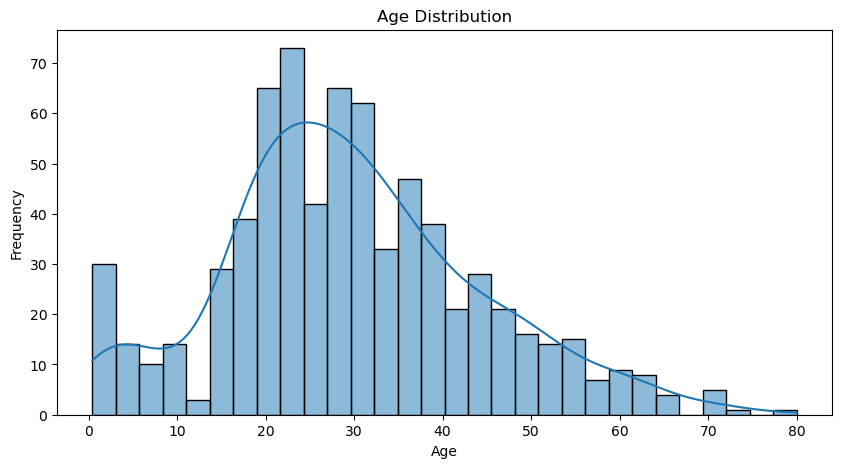

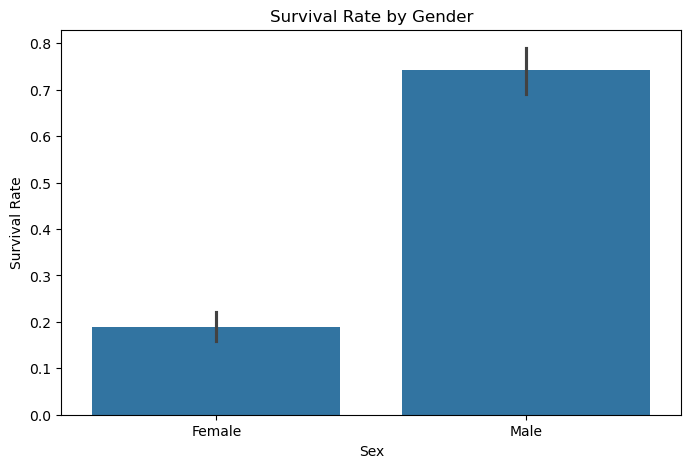

In [612]:
# Histogram for Age
plt.figure(figsize=(10, 5))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Bar plot for survival rates by gender
plt.figure(figsize=(8, 5))
sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()


### Step 2: Analyzing Survival Rates

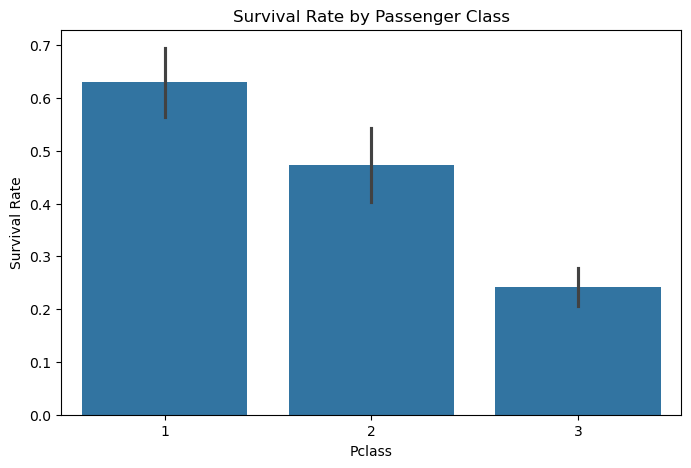

In [613]:
# Bar plot for survival rates by passenger class
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

### Step 3: Correlation Matrix

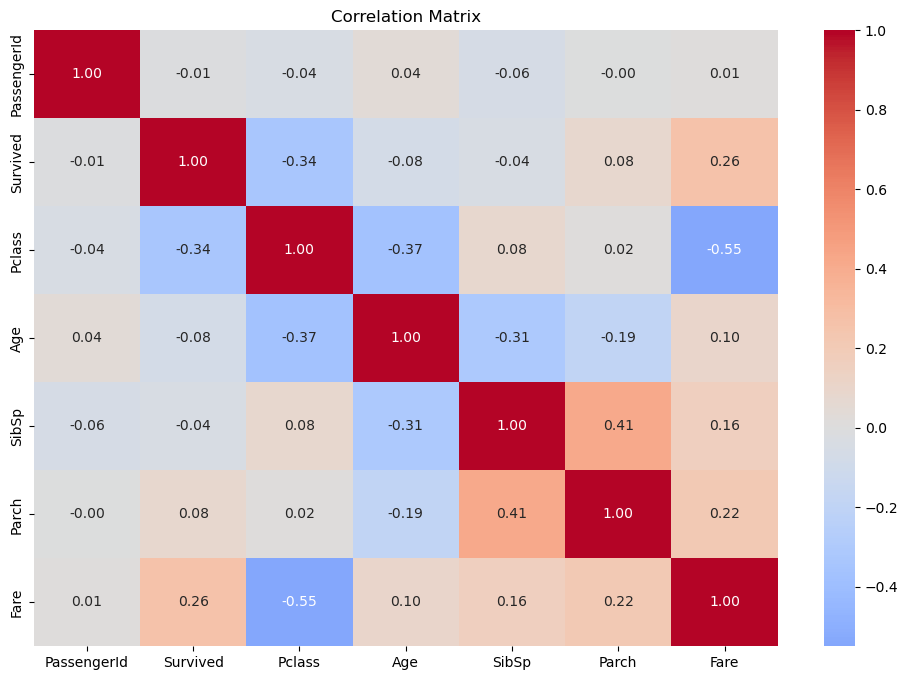

In [614]:
# Correlation matrix
plt.figure(figsize=(12, 8))
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

## Model Building

### Step 1: Initialize the MLP Model


We initialize an MLP model with two hidden layers of 10 neurons each and set the maximum iterations to 1000.

In [615]:
# Initialize the model
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

model = keras.Sequential()


### Step 2: Train the Model

We fit the MLP model using the training data.

In [616]:
X_train.shape

(712, 8)

In [617]:
# Build model
model.add(keras.Input(shape=(8,)))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy')

# Early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=16,
    epochs=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/32
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 145.4195 - val_loss: 91.7154
Epoch 2/32
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 53.5917 - val_loss: 13.8220
Epoch 3/32
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4979 - val_loss: 1.7874
Epoch 4/32
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3770 - val_loss: 1.1390
Epoch 5/32
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8936 - val_loss: 0.8356
Epoch 6/32
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7134 - val_loss: 0.7153
Epoch 7/32
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6489 - val_loss: 0.7142
Epoch 8/32
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6549 - val_loss: 0.6789
Epoch 9/32
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6364 - val_loss: 0.8270
Epoch 10/32
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6842 - val_loss: 0.6649
Epoch 11/32
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6091 - val_loss: 0.6523
Epoch 12/32
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6523 - v

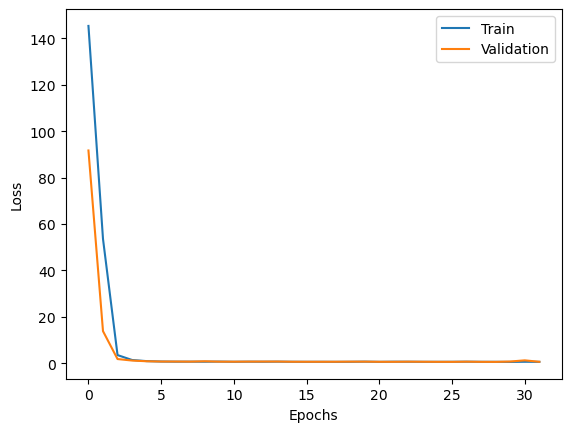

In [618]:
# --- Plot Training vs Validation Loss ---
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [619]:
model.summary(
    line_length=None,
    positions=None,
    print_fn=None,
    expand_nested=False,
    show_trainable=False,
    layer_range=None,
)

Model: "sequential_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_115 (Dense)               │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_116 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_117 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 869 (3.40 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 580 (2.27 KB)

### Step 3: Predictions

Make predictions using the test set.

In [620]:
# Predictions

# Get predicted probabilities
y_pred_probs = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred = (y_pred_probs > 0.5).astype(int)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


## Evaluation

Evaluate the performance of the model using accuracy and other metrics.



##### Model Evaluation

In [621]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Remove NaN rows from test data
nan_indices = np.isnan(y_test) # Find indices of rows with NaN values in y_test
X_test = X_test[~nan_indices]
y_test = y_test[~nan_indices]


# Predictions (convert probabilities to class labels)
y_pred = (model.predict(X_test) > 0.5).astype(int)


# Evaluation

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Final Model Accuracy: {accuracy:.2f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Final Model Accuracy: 0.68
Classification Report:
              precision    recall  f1-score   support

         0.0       0.66      0.92      0.77       105
         1.0       0.76      0.34      0.47        74

    accuracy                           0.68       179
   macro avg       0.71      0.63      0.62       179
weighted avg       0.70      0.68      0.65       179

Confusion Matrix:
[[97  8]
 [49 25]]
